<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Data_Exploratory_and_Ploting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Import libaray</a></li>
        <li><a href="#pre-processing">Data Loading</a></li>
         <li><a href="#pre-processing">Preprocessing</a></li>
        <li><a href="#evaluation">Data Exploring
        <ul>
        <li><a href="#evaluation">Dtale</a></li>
        <li><a href="#evaluation">Lux</a></li>
        <li><a href="#evaluation">Pandas Profiling</a></li>
         <li><a href="#evaluation">Logistic Regression</a></li>
         <li><a href="#evaluation">KNN</a></li>
         <li><a href="#evaluation">Naive Bayes</a></li>
         <li><a href="#evaluation">Deep Neural Multilayer Perceptron (MLP)</a></li>
         <li><a href="#evaluation">Gradient Boosting</a></li>
         <li><a href="#evaluation">ExtraTreesClassifier</a></li>
         <li><a href="#evaluation">LGBM Classifer</a></li>
         <li><a href="#evaluation">CatBoost</a></li>
    </ul>
</div>
<br>
<hr>


# **Introduction**

# **Import libaray**

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **Dataset**

**Load data from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Datasets/Student field Recommendation /Placement_Data_Full_Class.csv")

**Builten Iris dataset in scikit-learn**

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()

In [2]:
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# **1- Exploratory data analysis (EDA)(Begineer Level)**

In [4]:
X = iris.data
y = iris.target

In [5]:
df = pd.DataFrame(X, columns=iris.feature_names)


## **1.1-Numerical EDA**

In [ ]:
print(df.head())

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info()

In [ ]:
df.describe(include='all')


## **1.2-Visual EDA**

In [ ]:

plt.figure()
sns.countplot(X='sepal length (cm)', y='Setosa', data=df, palette='RdBu')
plt.xticks([0,1], ['Virginica', 'Setosa'])
plt.show()

## **1.2-Hiding Function**[5]

Sometimes when you do analysis and presenting the result to the other, you only want to show the most important aspect. I know when I present my Data Frame to the non-technical person, the question is often about the Index in their default number such as “what is this number?”. For that reason, we could try to hide the index with the following code.

In [ ]:
#Using hide_index() from the style function

df.head(10).style.hide_index()

<ipython-input-11-ae401fca442f>:3: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.head(10).style.hide_index()


sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
5.100000,3.500000,1.400000,0.200000
4.900000,3.000000,1.400000,0.200000
4.700000,3.200000,1.300000,0.200000
4.600000,3.100000,1.500000,0.200000
5.000000,3.600000,1.400000,0.200000
5.400000,3.900000,1.700000,0.400000
4.600000,3.400000,1.400000,0.300000
5.000000,3.400000,1.500000,0.200000
4.400000,2.900000,1.400000,0.200000
4.900000,3.100000,1.500000,0.100000


Just like that, we hide our index. It is a simple thing but in the working environment I know sometimes it would become a problem. Just one extra column that becomes a question.
In addition, we could try to hide unnecessary columns with the chaining method. Let’s say I don't want to show the ‘method’ and ‘year’ columns then we could write it with the following code.

In [ ]:
#Using hide_columns to hide the unnecesary columns
df.head(10).style.hide_index().hide_columns(['setosa', 'versicolor', 'virginica'])

## **1.3-Highlight Function**[5]

There is a time when we want to present our data frame and only highlight the important number, for example the highest number. In this case, we could use the built-in method to highlight it with the following code.

In [ ]:
#Highlight the maximum number for each column
data.head(10).style.highlight_max(color = 'yellow')

In the data frame above, we highlight the maximum number in each column with the color yellow. If you want to highlight the minimum number instead, we could do it with the following code.

In [ ]:
data.head(10).style.highlight_min(color = 'lightblue')


and if you want to chain it, we could also do that.

In [ ]:
#Highlight the minimum number with lightblue color and the maximum number with yellow color
data.head(10).style.highlight_max(color='yellow').highlight_min(color = 'lightblue')

Instead of each column, you could actually highlight the minimum or maximum number for each row. I show it in the following code.

In [ ]:
#Adding Axis = 1 to change the direction from column to row
data.head(10).style.highlight_max(color = 'yellow', axis =1)

As we can see, it is useless right now to change the axis as it did not highlight any important information. It would be more useful in the case when each column is not that different from each other.
As an addition, we could highlight the null value with the following code.

In [ ]:
#Higlight the null value
data.head(10).style.highlight_null(null_color = 'red')

## **1.4-Gradient Function**[5]

While presenting your data, we could also use all the information as the main way to present the data. I often present the data with a background color to highlight which number is in the lower area and where is the one in the higher area. Let’s use the example by the following code.

In [ ]:
#Gradient background color for the numerical columns
data.head(10).style.background_gradient(cmap = 'Blues')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.000000,Others,91.000000,Others,Commerce,58.000000,Sci&Tech,No,55.000000,Mkt&HR,58.800000,Placed,270000.000000
1,2,M,79.330000,Central,78.330000,Others,Science,77.480000,Sci&Tech,Yes,86.500000,Mkt&Fin,66.280000,Placed,200000.000000
2,3,M,65.000000,Central,68.000000,Central,Arts,64.000000,Comm&Mgmt,No,75.000000,Mkt&Fin,57.800000,Placed,250000.000000
3,4,M,56.000000,Central,52.000000,Central,Science,52.000000,Sci&Tech,No,66.000000,Mkt&HR,59.430000,Not Placed,nan
4,5,M,85.800000,Central,73.600000,Central,Commerce,73.300000,Comm&Mgmt,No,96.800000,Mkt&Fin,55.500000,Placed,425000.000000
5,6,M,55.000000,Others,49.800000,Others,Science,67.250000,Sci&Tech,Yes,55.000000,Mkt&Fin,51.580000,Not Placed,nan
6,7,F,46.000000,Others,49.200000,Others,Commerce,79.000000,Comm&Mgmt,No,74.280000,Mkt&Fin,53.290000,Not Placed,nan
7,8,M,82.000000,Central,64.000000,Central,Science,66.000000,Sci&Tech,Yes,67.000000,Mkt&Fin,62.140000,Placed,252000.000000
8,9,M,73.000000,Central,79.000000,Central,Commerce,72.000000,Comm&Mgmt,No,91.340000,Mkt&Fin,61.290000,Placed,231000.000000
9,10,M,58.000000,Central,70.000000,Central,Commerce,61.000000,Comm&Mgmt,No,54.000000,Mkt&Fin,52.210000,Not Placed,nan


With the background_gradient function, we could color the data frame as a gradient. The color would depend on the cmap parameter where the parameter is accepting colormaps from the matplotlib library.

We could also use a bar chart as our gradient background color. Let me show it in the example below.

In [ ]:
#Sort the values by the year column then creating a bar chart as the background
data.head(10).sort_values(by = 'ssc_p').style.bar(color= 'lightblue')

As we could see above, we now highlight the number from the lowest to the highest number in a different way than the background_gradient function is. We could also see the index is not in order because of the sort function; it is better to hide the index as I told you in the passage above.

## **1.5-Custom Function**[5]

If you prefer to have a more specific requirement to style your data frame, you could actually do it. We could pass our style functions into one of the following methods:
- Styler.applymap: element-wise
- Styler.apply: column-/row-/table-wise
Both of those methods take a function (and some other keyword arguments) and apply our function to the DataFrame in a certain way. Let’s say that I have a threshold that any number below 20 should be colored red. We could do that by using the following code.

In [ ]:
#Create the function to color the numerical value into red color
def color_below_20_red(value):
    if type(value) == type(''):
        return 'color:black'
    else:
        color = 'red' if value <= 20 else 'black'
        return 'color: {}'.format(color)
#We apply the function to all the element in the data frame by using the applymap function
data.head(10).style.applymap(color_below_20_red)

# **Preprocessing**

**Check Missing Value**


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
salary,67,0.311628
sl_no,0,0.000000
gender,0,0.000000
ssc_p,0,0.000000


In [ ]:
missing_v = [col for col in data.columns if (data[col].isnull().sum()/data.shape[0]) * 100 > 0.001]
print(len(missing_v))
for cols in missing_v:
    del data[cols]

1


In [ ]:
np.sum(data.isnull().any(axis=1))

0

**Hot Encoding**

In [ ]:
data.select_dtypes(include=['object']).columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [ ]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['ssc_b'] = data['ssc_b'].fillna(data['ssc_b'].mode()[0])
data['hsc_b'] = data['hsc_b'].fillna(data['hsc_b'].mode()[0])
data['hsc_s'] = data['hsc_s'].fillna(data['hsc_s'].mode()[0])
data['degree_t'] = data['degree_t'].fillna(data['degree_t'].mode()[0])
data['workex'] = data['workex'].fillna(data['workex'].mode()[0])
data['specialisation'] = data['specialisation'].fillna(data['specialisation'].mode()[0])
data['status'] = data['status'].fillna(data['status'].mode()[0])


In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [ ]:
data

**Feature Scaling**

In [ ]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(data)
data = pd.DataFrame(r_scaler.transform(data), index=data.index, columns=data.columns)

**Data spliting**


In [ ]:
X=data.drop('specialisation',axis=1)


In [ ]:
y=data[['specialisation']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


# **Data Ploting**

Data Visualization is very important in data analysis and machine learning, it allows us to have a better understanding about the pattern of some variables in our data, conclude some correlation between multiple variables, and eventually we can take the right decision based on that [9]

I will use the Matplotlib package, which is a 2D graphical library in Python language, it supports plotting graphics and images of the data in an attractive way[9]

## **Matplotlib**

### **Simplest Way to Create Visualizations**

In [ ]:
data

In [ ]:
X_new=data.filter(['gender', 'ssc_p','ssc_b'])


In [ ]:
X_new

One can simply plot out the values for each of these columns per row simply with data.plot.bar();, where data should be replaced with the name of the DataFrame. Note that adding the semicolon (;) after the statement removes the cell from outputting other prints (that is, something like) [9]

Alternatively, try adding a parameter stacked=True — this is a very easy way to create a stacked bar chart straight from the data source [9]

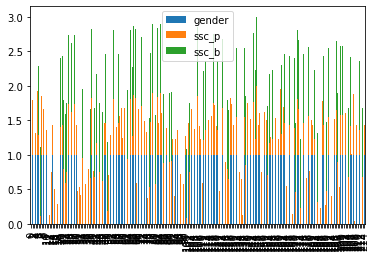

In [ ]:
X_new.plot.bar(stacked=True);

Or, try using barh, which draws horizontal bars: data.plot.barh(stacked=True). All these variants can be easily created with only one line of code because they establish a direct flow with the data.[9]

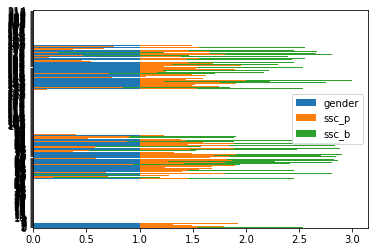

In [ ]:
X_new.plot.barh(stacked=True)

Another method of displaying this type of data would be an area chart, using

In [ ]:
X_new.plot.area();


Parameters within the code can be adjusted as they would normally would with a matplotlib or seaborn model. In the case of data.plot.area(stacked=False);, the parameter alpha (transparency) is set to 0.5 by default, but can be manually adjusted [9]

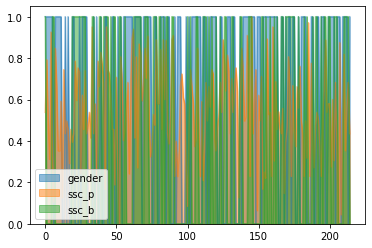

In [ ]:
X_new.plot.area(stacked=False);

One of the major benefits of using pandas directly is that many of pandas’ helpful DataFrame manipulations can be directly used. For example, consider the result of data.diff(), which simply takes the difference between one row and the row before it (hence the presence of NaN in the first row). This is helpful in many time series applications.

In [ ]:
X_new.diff()

For example, consider the following code, which plots out the differenced data, as well as demonstrating the usage of various parameters in pandas plotting, in this case, color:[9]

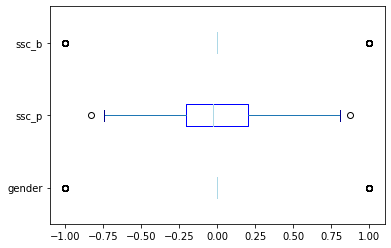

In [ ]:
X_new.diff().plot.box(vert=False,
                     color={'medians':'lightblue',
                            'boxes':'blue',
                            'caps':'darkblue'});

Another application of pandas’ handy data manipulation functions is with .rolling().mean(), which takes the average rolling mean, a common statistical method to reduce the noisiness of data that averages moving windows of data.[9]

In [ ]:

X_new['gender'].plot()
X_new['gender'].rolling(10).mean().plot()

There are various other types of plots that can be created directly from the data:
kde or density for density plots

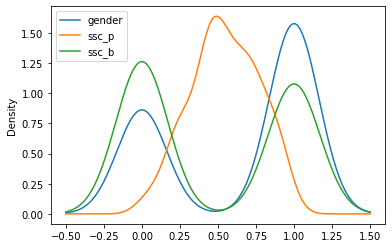

In [ ]:
X_new.plot.kde(); #distribution plot

In [ ]:
y.plot.pie(subplots=True, figsize=(8, 4));



As another example of the convenience of subplots in direct-pandas plotting, consider plotting line data (the default when using .plot()):[9]

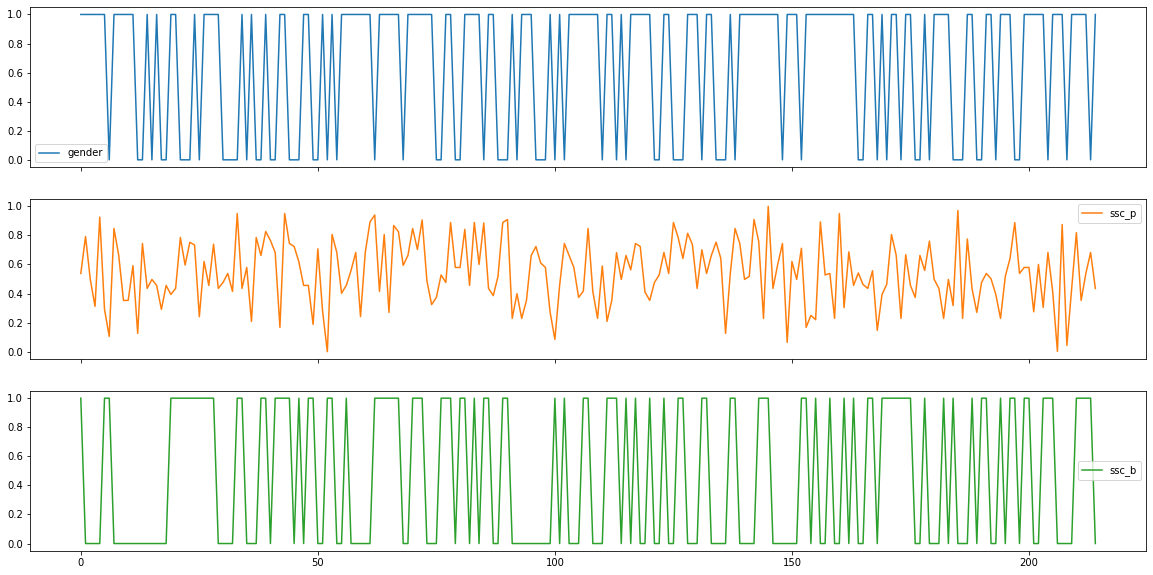

In [ ]:
X_new.plot(subplots=True,figsize=(20,10));

Consider the result when adding a parameter layout=(2, 2) in the line of code that plots the visualization (after subplots=True): pandas automatically formats the subplots in a format according to the layout. The dimensions of each subplot are determined by the figsize argument, which specifies the size of the “master-plot” that encompasses all subplots [9]

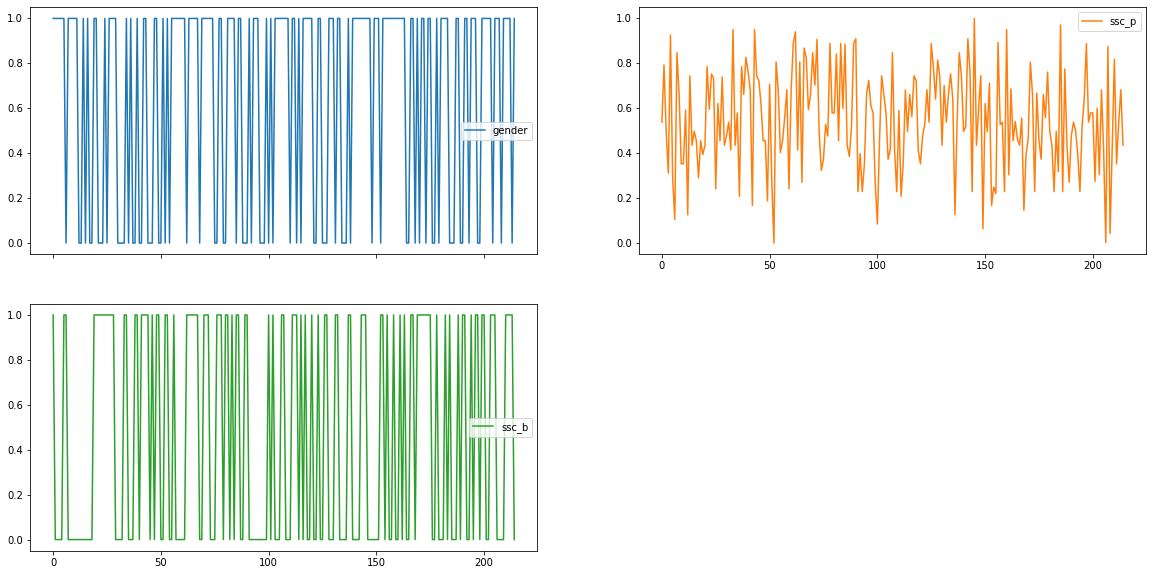

In [ ]:
X_new.plot(subplots=True,figsize=(20,10), layout=(2, 2));

## **Seaborn**

Developers created a new library based on matplotlib called seaborn. Seaborn is as powerful as matplotlib while also providing an abstraction to simplify plots and bring some unique features[11]

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
Seaborn’s design allows you to explore and understand your data quickly. Seaborn works by capturing entire dataframes or arrays containing all your data and performing all the internal functions necessary for semantic mapping and statistical aggregation to convert data into informative plots.
It abstracts complexity while allowing you to design your plots to your requirements [11]

In [ ]:
!pip install seaborn notebook


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

In [ ]:
X_new

### **Scatter Plot**


A scatter plot is a diagram that displays points based on two dimensions of the dataset. Creating a scatter plot in the seaborn library is so simple and requires just one line of code:[11]

In [ ]:
sns.scatterplot(data=X_new)


### **Line Plot**

This plot draws a line that represents the revolution of continuous or categorical data. It is a popular and known type of chart, and it’s super easy to produce. Similarly to before, we use the function lineplot with the dataset and the columns represent the x and y axes. Seaborn will do the rest.[11]

In [ ]:
sns.lineplot(data=X_new)


### **Bar Plot**

This is probably the best-known type of chart, and as you may have predicted, we can plot this type of plot with seaborn in the same way as we did for line and scatter plots by using the function barplot.[11]

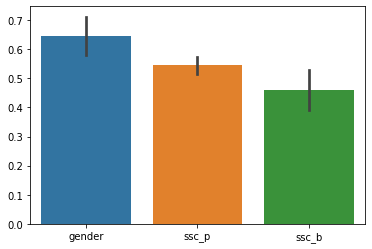

In [ ]:
sns.barplot(data=X_new)


In [ ]:
sns.barplot(data=X_new)

### **Making Beautiful Plots With Style**s


Seaborn gives you the ability to change your graph’s interface, and it provides five different styles out of the box: darkgrid, whitegrid, dark, white, and ticks.[11]

In [ ]:
sns.set_style("darkgrid")
sns.lineplot(data = X_new)

In [ ]:
sns.hist(X_new)

#**Automatic Data Ploting**

## **Dtale**

In [ ]:
!pip install dtale

In [ ]:
import dtale
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Datasets/Recommended System/Placement_Data_Full_Class.csv")
d = dtale.show(df, ignore_duplicate=True)
d

http://4ce9203885b8:40000/dtale/main/1

## **Chartify** [4]

Chartify is a visualization library that aims to make it as easy as possible for data scientists to create charts. It comes with user-friendly syntax and consistent data formatting compared to other tools. It takes less time to create beautiful and quick charts. This was developed by Spotify labs.
Here, I am showing only the bar chart. For more details and charts, please check this documentation and notebook

In [ ]:
!pip install chartify


In [ ]:
# importing necessary library
import numpy as np
import pandas as pd
import chartify
#loading example dataset from chartify
data = chartify.examples.example_data()
data.head()

,date,country,fruit,unit_price,quantity,total_price
0,2017-10-21,US,Banana,0.303711,4,1.214846
1,2017-05-30,JP,Banana,0.254109,4,1.016436
2,2017-05-21,CA,Banana,0.268635,4,1.074539
3,2017-09-18,BR,Grape,2.215277,2,4.430554
4,2017-12-08,US,Banana,0.308337,5,1.541687


In [ ]:
# Calculating total quanity for each fruits
quantity_by_fruit = (data.groupby(‘fruit’)[‘quantity’].sum().reset_index())
ch = chartify.Chart(blank_labels=True, x_axis_type=’categorical’)
ch.set_title(“Vertical bar plot”)
ch.set_subtitle(“Automatically sorts by value counts.”)
ch.plot.bar(
 data_frame=quantity_by_fruit,
 categorical_columns=’fruit’,
 numeric_column=’quantity’)
ch.show()

## **Lux**

Lux will take any data frame and automatically suggest visualizations that the user can click on and create in an instant. Getting the syntax correct for visualizations can be time consuming and Lux reduces this time to only a few seconds[10]

In [ ]:
!pip install lux-api


     |████████████████████████████████| 123 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9 MB 19.0 MB/s 
     |████████████████████████████████| 2.5 MB 36.8 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
     |████████████████████████████████| 42 kB 712 kB/s 
  Created wheel for lux-api: filename=lux_api-0.4.0-py3-none-any.whl size=181967 sha256=945dd6ee597b67e6a2eb1ffcfdbc2f6a936bcbac9c67784ee55e0578a81d7940
  Stored in directory: /root/.cache/pip/wheels/1d/2a/80/9e7f8b9c5642f147e99d9354bd41e21c14e912ef3224c30f43
  Created wheel for lux-widget: filename=lux_widget-0.1.10-py3-none-any.whl size=2539952 sha256=08d68568b4abc4de9cc75cfbda1ee3a5b2923b6a83f223844c1dee456b0c4582
  Stored in directory: /root/.cache/pip/wheels/6d/7c/ab/6b22af94201ab6ed98247aa8a2925eb5b62435ad8382b67f6e
Successfully built lux-api lux-widget
  Attempting uninstall:

In [ ]:
!pip install git+https://github.com/lux-org/lux.git


In [ ]:
import pandas as pd
import lux

In [ ]:
df = pd.read_csv("https://github.com/lux-org/lux-datasets/blob/master/data/hpi_full.csv?raw=True")

In [ ]:
df

Lux also offer an intent feature, where you can specify which attributes (columns) they are interested in. Lux will offer charts specific to those columns.

In [ ]:
df.intent = ["Inequality","AvrgLifeExpectancy"]

In [ ]:
df

## **Pandas Profiling**

This should be no surprise to those of you who’ve been following me. The benefits of this tool are obvious. The animation below is the results of calling the simple method df.profile_report(), take a look at the resulting report yourself[6]

Using this tool is simple a matter of installing and importing the Pandas Profiling package.
I wont spend too much time on this one since I’ve already written a small article on the subject, so if you want to know more about this gem of a package, then please read my article about Pandas Profiling here:

In [ ]:
!pip install pandas-profiling

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np

In [ ]:
pandas_profiling.ProfileReport(data)

## **Sweetviz**

Sweetviz is an open-source python library that generates beautiful, high-density visualizations to start your EDA. Let us explore Sweetviz and its functionalities in detail. The version which we will be exploring is V 2.0.6 which is released on 06/02/2021.[7]

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz
import pandas as pd
import sweetviz as sv
my_report  = sweetviz.analyze([data,'Train'], target_feat='specialisation')
my_report.show_html('FinalReport.html')

**Create Analysis Report**

Let’s start by creating an analysis report which will be helpful in performing Data analysis and creates an interactive HTML report of data with visualization.[7]

In [ ]:
import sweetviz as sv


In [ ]:
analyze_report = sv.analyze(X_train)
analyze_report.show_html()

This is the main page of the report, Here on the right side you can see associations as highlighted which shows the corelation of the features. Similarly we can highlight different feature columns in order to analyze them, let me show you one example of analyzing a column.[6]

So, here in this image you can clearly see how you can select a particular column to analyze it in depth with visualization.
Next we will see how we can create comparison reports. Sweetviz allows you to create Inter comapison and intra comparison(based on a particular column).

**Train and Test Data Compaison[7]**

We can create a comparison report where we can analyze the similarities and differences between the test and the training data.

In [ ]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0.000000,1.0,0.538240,1.0,0.889621,1.0,0.5,0.195122,1.0,0.0,0.104167,1.0,0.284483,1.0
1,0.004673,1.0,0.792414,0.0,0.680890,1.0,1.0,0.670244,1.0,1.0,0.760417,0.0,0.564843,1.0
2,0.009346,1.0,0.497011,0.0,0.510708,0.0,0.0,0.341463,0.0,0.0,0.520833,0.0,0.247001,1.0
3,0.014019,1.0,0.311482,0.0,0.247117,0.0,1.0,0.048780,1.0,0.0,0.333333,1.0,0.308096,0.0
4,0.018692,1.0,0.925788,0.0,0.602965,0.0,0.5,0.568293,0.0,0.0,0.975000,0.0,0.160795,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.981308,1.0,0.818594,1.0,0.741351,1.0,0.5,0.673171,0.0,0.0,0.854167,0.0,0.872564,1.0
211,0.985981,1.0,0.352711,1.0,0.378913,1.0,1.0,0.536585,1.0,0.0,0.500000,0.0,0.090330,1.0
212,0.990654,1.0,0.538240,1.0,0.494234,1.0,0.5,0.560976,0.0,1.0,0.187500,0.0,0.693778,1.0
213,0.995327,0.0,0.682540,1.0,0.477759,1.0,0.5,0.195122,0.0,0.0,0.416667,1.0,0.338081,1.0


In [ ]:
compare = sv.compare([X_train, "Training Data"], [X_test, "Test Data"], "target")
compare.show_html()

                                             |          | [  0%]   00:00 -> (? left)

KeyError: ignored

## **Autoviz**

**Autoviz**

It stands for Automatically Visualize. Visualization is possible with any size of the dataset with a few lines of code.

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('/content/drive/MyDrive/Datasets/Recommended System/Placement_Data_Full_Class.csv')

## **Cufflinks & Plotly**[6]

Most of us who’re quote-unquote “experienced” Data Scientist or Data Analysts, will be quite familiar with the integration between matplotlib and pandas. Namely the fact that you can make quick plots of a simple pd.DataFrame or pd.Series by simply calling the .plot() method:

In [ ]:
! pip install cufflinks --upgrade

In [ ]:
!pip install -U ipykernel


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cufflinks as cp
cp.go_offline()

In [ ]:
X.satter_matrix()

Now this is all fine and dandy, but how about an interactive, pan-able, zoom-able, scale-able plot instead? Cufflinks to the rescue! (courtesy of Plotly)
To install Cufflinks in your environment simply run ! pip install cufflinks --upgrade in your favorite terminal and you’re ready to go. Take a look at the following:

## **Lens**

Lens is a library for exploring data in Pandas DataFrames. It computes single-column summary statistics and estimates the correlation between columns [11]

In [ ]:
!pip install lens


In [ ]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = sns.load_dataset("data")
df.head()

HTTPError: ignored

In [ ]:
!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 5.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
import lens
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [ ]:
X_new

NameError: ignored

In [ ]:
X_new._get_value(index,'name')



In [ ]:
explorer = lens.explore(X_new)


TypeError: ignored

## **TensorFlow Data Validation**

What it does: Makes data exploration for machine learning more intuitive
How easy it is to use: Easy
Who should use it: For those who need to a quick look at a dataset stats.
TensorFlow Data Validation is a dataset that makes data exploration when creating machine learning models easier. Although it is not as powerful as Bamboolib, it’s worth knowing about it. It’s the solution that TensorFlow found to make exploring the data less stressful and save users from typing a few lines of code. You can check for missing data, outliers, data anomalies, redundant features, features with little or no unique predictive information, labels treated as features, and more. [8]

In [ ]:
!pip install tensorflow-data-validation

In [ ]:
# Import Tensorflow Data Validation
import tensorflow_data_validation as tfdv
# Import Pandas
import pandas as pd
# Import Titanic dataset


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Datasets/Student field Recommendation /Placement_Data_Full_Class.csv")

In [ ]:
stats = tfdv.generate_statistics_from_dataframe(data)

tfdv.visualize_statistics(stats)

# **References**

[1- Top Python Libraries to Automate Exploratory Data Analysis in 2021](https://www.analyticsvidhya.com/blog/2021/04/top-python-libraries-to-automate-exploratory-data-analysis-in-2021/)

[2-Exploratory Data Analysis With One-Line of Code](https://medium.com/geekculture/exploratory-data-analysis-with-one-line-of-code-f4a8e0a55f56)

[3-Handy Data Visualization Functions in matplotlib & Seaborn to Speed Up Your EDA](https://betterprogramming.pub/handy-data-visualization-functions-in-matplotlib-seaborn-to-speed-up-your-eda-241ba0a9c47d)

[4-Five Cool Python Libraries for Data Science](https://pub.towardsai.net/five-cool-python-libraries-for-data-science-7f1fce402b90)

[5-My top 4 functions to style the Pandas Dataframe](https://towardsdatascience.com/my-top-4-functions-to-style-the-pandas-dataframe-932cdc79be39)

[6-7 things to quickly improve your Data Analysis in Python](https://towardsdatascience.com/7-things-to-quickly-improve-your-data-analysis-in-python-3d434243da7)

[7-Automating Exploratory Data Analysis- Part 1](https://medium.com/swlh/automating-exploratory-data-analysis-part-1-f5f2b7d548e5)]

[8-4 Amazing Python Libraries That You Should Try Right Now](https://towardsdatascience.com/4-amazing-python-libraries-that-you-should-try-right-now-872df6f1c93)

[9-The Simplest Way to Create Visualizations in Python Isn’t With matplotlib.](https://medium.com/analytics-vidhya/the-simplest-way-to-create-complex-visualizations-in-python-isnt-with-matplotlib-a5802f2dba92)

[10-3 Python Tools You Need to Try](https://medium.com/trymito/3-python-tools-you-need-to-try-72c3380974db)

[11-Beautiful Plots With Python and Seaborn](https://betterprogramming.pub/beautiful-plots-with-python-and-seaborn-9d05c9ead6ed)


[Bamboolib: One of the Most Useful Python Libraries You Have Ever Seen](https://towardsdatascience.com/bamboolib-one-of-the-most-useful-python-libraries-you-have-ever-seen-6ce331685bb7)

[The Quickest Guide to Data Visualization in Python using Matplotlib](https://medium.com/mlearning-ai/the-quickest-guide-to-data-visualization-in-python-using-matplotlib-a6a079b5de07)

[Automating Exploratory Data Analysis- Part 4](https://medium.com/swlh/automating-exploratory-data-analysis-part-4-43920f03b2cb)

[How to Automatically Generate Python Code for Spreadsheet Operations?](https://python.plainenglish.io/how-to-automatically-generate-python-code-for-spreadsheet-operations-ca3f59474971)

[3 Seaborn Functions That Cover (Almost) All Your Visualization Tasks](https://towardsdatascience.com/3-seaborn-functions-that-cover-almost-all-your-visualization-tasks-793f76510ac3)

[33 DATA VISUALIZATION TECHNIQUES ALL PROFESSIONALS SHOULD KNOW](https://dipesious.medium.com/33-data-visualization-techniques-all-professionals-should-know-ab999abe601a)

[5 Python Libraries That Will Help Automate Your Life](https://medium.com/geekculture/5-python-libraries-that-will-help-automate-your-life-34aa91d93b9b)

